#Set up the Environment

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

# Create spark session

In [ ]:
#parameter for master can be changed depending on the environment
spark = SparkSession.builder.master("local").appName("Exercise1").getOrCreate()

In [ ]:
print(spark.conf.get("spark.master"))  # Shows the master URL
print(spark.version)  # Displays the Spark version


local
3.5.5


In [ ]:
print(spark.sparkContext.statusTracker().getJobIdsForGroup(None))  # Lists job IDs


[0]


In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Big Data/Exercise1/exampleData.csv", header=True, inferSchema=True)
df.show(vertical=True)


-RECORD 0--------------------------------
 _c0                 | 14                
 dateTime            | 01-jan-1990 00:00 
 indicator_rain      | 0                 
 precipitation       | 0.3               
 indicator_temp      | 0                 
 air_temperature     | 9.1               
 indicator_wetb      | 0                 
 wetb                | 9.0               
 dewpt               | 8.9               
 vappr               | 11.4              
 relative_humidity   | 99                
 msl                 | 1006.7            
 indicator_wdsp      | 2                 
 wind_speed          | 7                 
 indicator_wddir     | 2                 
 wind_from_direction | 190               
-RECORD 1--------------------------------
 _c0                 | 15                
 dateTime            | 01-jan-1990 01:00 
 indicator_rain      | 0                 
 precipitation       | 0.2               
 indicator_temp      | 0                 
 air_temperature     | 8.2        

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- indicator_rain: integer (nullable = true)
 |-- precipitation: string (nullable = true)
 |-- indicator_temp: integer (nullable = true)
 |-- air_temperature: string (nullable = true)
 |-- indicator_wetb: integer (nullable = true)
 |-- wetb: string (nullable = true)
 |-- dewpt: string (nullable = true)
 |-- vappr: string (nullable = true)
 |-- relative_humidity: string (nullable = true)
 |-- msl: string (nullable = true)
 |-- indicator_wdsp: integer (nullable = true)
 |-- wind_speed: string (nullable = true)
 |-- indicator_wddir: integer (nullable = true)
 |-- wind_from_direction: integer (nullable = true)



# Stats about the data

In [ ]:
df.describe().show()
#print the shape/size of the dataframe
print((df.count(), len(df.columns)))

+-------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|              _c0|         dateTime|    indicator_rain|      precipitation|    indicator_temp|   air_temperature|    indicator_wetb|              wetb|            dewpt|             vappr| relative_humidity|               msl|    indicator_wdsp|        wind_speed|   indicator_wddir|wind_from_direction|
+-------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|  count|           245088|           245088|            2450

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col

numeric_cols = ['precipitation', 'air_temperature', 'wetb', 'dewpt',
                'vappr', 'relative_humidity', 'msl', 'wind_speed']

for c in numeric_cols:
    df = df.withColumn(c, col(c).cast(DoubleType()))

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- indicator_rain: integer (nullable = true)
 |-- precipitation: double (nullable = true)
 |-- indicator_temp: integer (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- indicator_wetb: integer (nullable = true)
 |-- wetb: double (nullable = true)
 |-- dewpt: double (nullable = true)
 |-- vappr: double (nullable = true)
 |-- relative_humidity: double (nullable = true)
 |-- msl: double (nullable = true)
 |-- indicator_wdsp: integer (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- indicator_wddir: integer (nullable = true)
 |-- wind_from_direction: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import to_timestamp, year, month, dayofmonth, hour

df = df.withColumn("timestamp", to_timestamp(col("dateTime"), "dd-MMM-yyyy HH:mm"))
df = df.withColumn("year", year("timestamp"))\
       .withColumn("month", month("timestamp"))\
       .withColumn("day", dayofmonth("timestamp"))\
       .withColumn("hour", hour("timestamp"))

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- indicator_rain: integer (nullable = true)
 |-- precipitation: double (nullable = true)
 |-- indicator_temp: integer (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- indicator_wetb: integer (nullable = true)
 |-- wetb: double (nullable = true)
 |-- dewpt: double (nullable = true)
 |-- vappr: double (nullable = true)
 |-- relative_humidity: double (nullable = true)
 |-- msl: double (nullable = true)
 |-- indicator_wdsp: integer (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- indicator_wddir: integer (nullable = true)
 |-- wind_from_direction: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)



In [ ]:
df.show(vertical=True)

-RECORD 0----------------------------------
 _c0                 | 14                  
 dateTime            | 01-jan-1990 00:00   
 indicator_rain      | 0                   
 precipitation       | 0.3                 
 indicator_temp      | 0                   
 air_temperature     | 9.1                 
 indicator_wetb      | 0                   
 wetb                | 9.0                 
 dewpt               | 8.9                 
 vappr               | 11.4                
 relative_humidity   | 99.0                
 msl                 | 1006.7              
 indicator_wdsp      | 2                   
 wind_speed          | 7.0                 
 indicator_wddir     | 2                   
 wind_from_direction | 190                 
 timestamp           | 1990-01-01 00:00:00 
 year                | 1990                
 month               | 1                   
 day                 | 1                   
 hour                | 0                   
-RECORD 1-----------------------

In [ ]:
from pyspark.sql.functions import col, count, when

# Create a summary DataFrame with proper parentheses
missing_stats = df.select(*[
    count(when(col(c).isNull(), c)).alias(c + "_nulls") for c in df.columns
])

# For empty strings (only on string columns)
empty_stats = df.select(*[
    count(when((col(c) == "") & (col(c).isNotNull()), c)).alias(c + "_empty")
    for c in df.columns if str(df.schema[c].dataType) == "StringType()"
])

# Show the results
print("Null counts:")
missing_stats.show(vertical=True)

print("\nEmpty string counts:")
empty_stats.show(vertical=True)

Null counts:
-RECORD 0--------------------------
 _c0_nulls                 | 0     
 dateTime_nulls            | 0     
 indicator_rain_nulls      | 0     
 precipitation_nulls       | 384   
 indicator_temp_nulls      | 0     
 air_temperature_nulls     | 18730 
 indicator_wetb_nulls      | 0     
 wetb_nulls                | 26462 
 dewpt_nulls               | 26462 
 vappr_nulls               | 49571 
 relative_humidity_nulls   | 49560 
 msl_nulls                 | 32814 
 indicator_wdsp_nulls      | 0     
 wind_speed_nulls          | 349   
 indicator_wddir_nulls     | 0     
 wind_from_direction_nulls | 608   
 timestamp_nulls           | 0     
 year_nulls                | 0     
 month_nulls               | 0     
 day_nulls                 | 0     
 hour_nulls                | 0     


Empty string counts:
-RECORD 0-------------
 dateTime_empty | 0   



# Finding mean value of each column

In [ ]:
from pyspark.sql.functions import col, mean, median, approx_count_distinct
from pyspark.ml.feature import Imputer

## First, let's examine the distribution of some key columns
# For numeric columns with many nulls
numeric_cols = ['precipitation', 'air_temperature', 'wetb', 'dewpt',
                'vappr', 'relative_humidity', 'msl', 'wind_speed']

# Calculate basic stats to inform our imputation
for c in numeric_cols:
    df.select(
        mean(col(c)).alias(f'{c}_mean'),
        approx_count_distinct(col(c)).alias(f'{c}_distinct')
    ).show()

+-------------------+----------------------+
| precipitation_mean|precipitation_distinct|
+-------------------+----------------------+
|0.08218378122139193|                   110|
+-------------------+----------------------+

+--------------------+------------------------+
|air_temperature_mean|air_temperature_distinct|
+--------------------+------------------------+
|  10.118573675328445|                     296|
+--------------------+------------------------+

+-----------------+-------------+
|        wetb_mean|wetb_distinct|
+-----------------+-------------+
|9.172571880746105|          264|
+-----------------+-------------+

+----------------+--------------+
|      dewpt_mean|dewpt_distinct|
+----------------+--------------+
|7.83209224886334|           281|
+----------------+--------------+

+------------------+--------------+
|        vappr_mean|vappr_distinct|
+------------------+--------------+
|10.988673619174033|           207|
+------------------+--------------+

+---------

# Data cleaning: Imputing null values

In [ ]:
# Put it all together in a pipeline
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer

# Define imputation strategies for numeric columns
numeric_cols = ['precipitation', 'air_temperature', 'wetb', 'dewpt',
                'vappr', 'relative_humidity', 'msl', 'wind_speed']

# Create imputers - one for each strategy
imputers = [Imputer(inputCol=c, outputCol=f"{c}_imputed", strategy="median")
            for c in numeric_cols]

# For wind direction (categorical)
from pyspark.sql.functions import last, when
from pyspark.sql.window import Window

window = Window.orderBy('timestamp').rowsBetween(-1, -1)
df = df.withColumn('wind_from_direction_imputed',
                   when(col('wind_from_direction').isNull(),
                        last('wind_from_direction', ignorenulls=True).over(window))
                   .otherwise(col('wind_from_direction')))

# Create and run pipeline
pipeline = Pipeline(stages=imputers)
model = pipeline.fit(df)
df_imputed = model.transform(df)

# Drop original columns if desired
df_clean = df_imputed.drop(*numeric_cols)

In [ ]:
# Check if nulls remain
null_counts_after = df_clean.select([
    count(when(col(c).isNull(), c)).alias(c + "_nulls")
    for c in df_clean.columns
]).collect()[0]

print("Null counts after imputation:")
for c in df_clean.columns:
    print(f"{c}: {null_counts_after[c + '_nulls']}")

Null counts after imputation:
_c0: 0
dateTime: 0
indicator_rain: 0
indicator_temp: 0
indicator_wetb: 0
indicator_wdsp: 0
indicator_wddir: 0
wind_from_direction: 608
timestamp: 0
year: 0
month: 0
day: 0
hour: 0
wind_from_direction_imputed: 272
precipitation_imputed: 0
air_temperature_imputed: 0
wetb_imputed: 0
dewpt_imputed: 0
vappr_imputed: 0
relative_humidity_imputed: 0
msl_imputed: 0
wind_speed_imputed: 0


# Data cleaning: Imputation of null values that didn't go away after first imputation.

In [ ]:
from pyspark.sql.functions import col, coalesce, lag, lead, lit, when
from pyspark.sql.window import Window

# 1. Create base DataFrame with window specifications
window_spec = Window.orderBy("timestamp")

df_filled = (df_clean
    # 2. Add previous and next wind directions
    .withColumn("prev_wind", lag("wind_from_direction").over(window_spec))
    .withColumn("next_wind", lead("wind_from_direction").over(window_spec))

    # 3. Simple fill strategy (order of priority)
    .withColumn("wind_fill1", coalesce(
        col("wind_from_direction"),  # Original value
        col("prev_wind"),            # Previous value
        col("next_wind"),            # Next value
        lit(0)                       # Default fallback
    ))

    # 4. Circular-aware fill for remaining nulls (optional)
    .withColumn("wind_final", when(
        col("wind_fill1").isNull(),
        ((col("prev_wind") + col("next_wind") + 360) % 360)
    ).otherwise(col("wind_fill1")))

    # 5. Clean up intermediate columns
    .drop("prev_wind", "next_wind", "wind_fill1")
)

# 6. Verify results
print("Null values after imputation:", df_filled.filter(col("wind_final").isNull()).count())
df_filled.select("timestamp", "wind_from_direction", "wind_final").show(5)


Null values after imputation: 0
+-------------------+-------------------+----------+
|          timestamp|wind_from_direction|wind_final|
+-------------------+-------------------+----------+
|1990-01-01 00:00:00|                190|       190|
|1990-01-01 01:00:00|                220|       220|
|1990-01-01 02:00:00|                190|       190|
|1990-01-01 03:00:00|                190|       190|
|1990-01-01 04:00:00|                220|       220|
+-------------------+-------------------+----------+
only showing top 5 rows



In [ ]:
# Check if nulls remain
null_counts_after = df_filled.select([
    count(when(col(c).isNull(), c)).alias(c + "_nulls")
    for c in df_filled.columns
]).collect()[0]

print("Null counts after imputation:")
for c in df_filled.columns:
    print(f"{c}: {null_counts_after[c + '_nulls']}")

Null counts after imputation:
_c0: 0
dateTime: 0
indicator_rain: 0
indicator_temp: 0
indicator_wetb: 0
indicator_wdsp: 0
indicator_wddir: 0
wind_from_direction: 608
timestamp: 0
year: 0
month: 0
day: 0
hour: 0
wind_from_direction_imputed: 272
precipitation_imputed: 0
air_temperature_imputed: 0
wetb_imputed: 0
dewpt_imputed: 0
vappr_imputed: 0
relative_humidity_imputed: 0
msl_imputed: 0
wind_speed_imputed: 0
wind_final: 0


In [ ]:
df_filled.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- indicator_rain: integer (nullable = true)
 |-- indicator_temp: integer (nullable = true)
 |-- indicator_wetb: integer (nullable = true)
 |-- indicator_wdsp: integer (nullable = true)
 |-- indicator_wddir: integer (nullable = true)
 |-- wind_from_direction: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- wind_from_direction_imputed: integer (nullable = true)
 |-- precipitation_imputed: double (nullable = true)
 |-- air_temperature_imputed: double (nullable = true)
 |-- wetb_imputed: double (nullable = true)
 |-- dewpt_imputed: double (nullable = true)
 |-- vappr_imputed: double (nullable = true)
 |-- relative_humidity_imputed: double (nullable = true)
 |-- msl_imputed: double (nullable = true)
 |-- wind_speed_imputed: double (null

In [ ]:
from pyspark.sql.functions import min, max, datediff

# Compute min and max timestamps
min_max_df = df_filled.agg(
    min("timestamp").alias("min_timestamp"),
    max("timestamp").alias("max_timestamp")
)

# Extract the values
min_max = min_max_df.first()
start_date = min_max["min_timestamp"]
end_date = min_max["max_timestamp"]

# Calculate days between start and end dates
duration_days = min_max_df.withColumn(
    "days_diff", datediff("max_timestamp", "min_timestamp")
).select("days_diff").first()[0]

from pyspark.sql.functions import expr

# Calculate precise duration in seconds and convert
duration = df_filled.agg(
    expr("(unix_timestamp(max(timestamp)) - unix_timestamp(min(timestamp))) as seconds_diff")
).first()[0]

days = duration // (24 * 3600)
remaining_seconds = duration % (24 * 3600)
hours = remaining_seconds // 3600
remaining_seconds %= 3600
minutes = remaining_seconds // 60

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Total Duration: {duration_days} days")
print(f"Detailed Duration: {days} days, {hours} hours, {minutes} minutes")
print(f"Total duration in year: {days/365}")

Start Date: 1990-01-01 00:00:00
End Date: 2020-03-01 00:00:00
Total Duration: 11017 days
Detailed Duration: 11017 days, 0 hours, 0 minutes
Total duration in year: 30.183561643835617


In [ ]:
df_filled.show()


+---+-----------------+--------------+--------------+--------------+--------------+---------------+-------------------+-------------------+----+-----+---+----+---------------------------+---------------------+-----------------------+------------+-------------+-------------+-------------------------+-----------+------------------+----------+
|_c0|         dateTime|indicator_rain|indicator_temp|indicator_wetb|indicator_wdsp|indicator_wddir|wind_from_direction|          timestamp|year|month|day|hour|wind_from_direction_imputed|precipitation_imputed|air_temperature_imputed|wetb_imputed|dewpt_imputed|vappr_imputed|relative_humidity_imputed|msl_imputed|wind_speed_imputed|wind_final|
+---+-----------------+--------------+--------------+--------------+--------------+---------------+-------------------+-------------------+----+-----+---+----+---------------------------+---------------------+-----------------------+------------+-------------+-------------+-------------------------+-----------+--

Data visualization: Temperature change trend over the past 30 years

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Yearly Average Temperature Metrics')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Temperature (°C)')

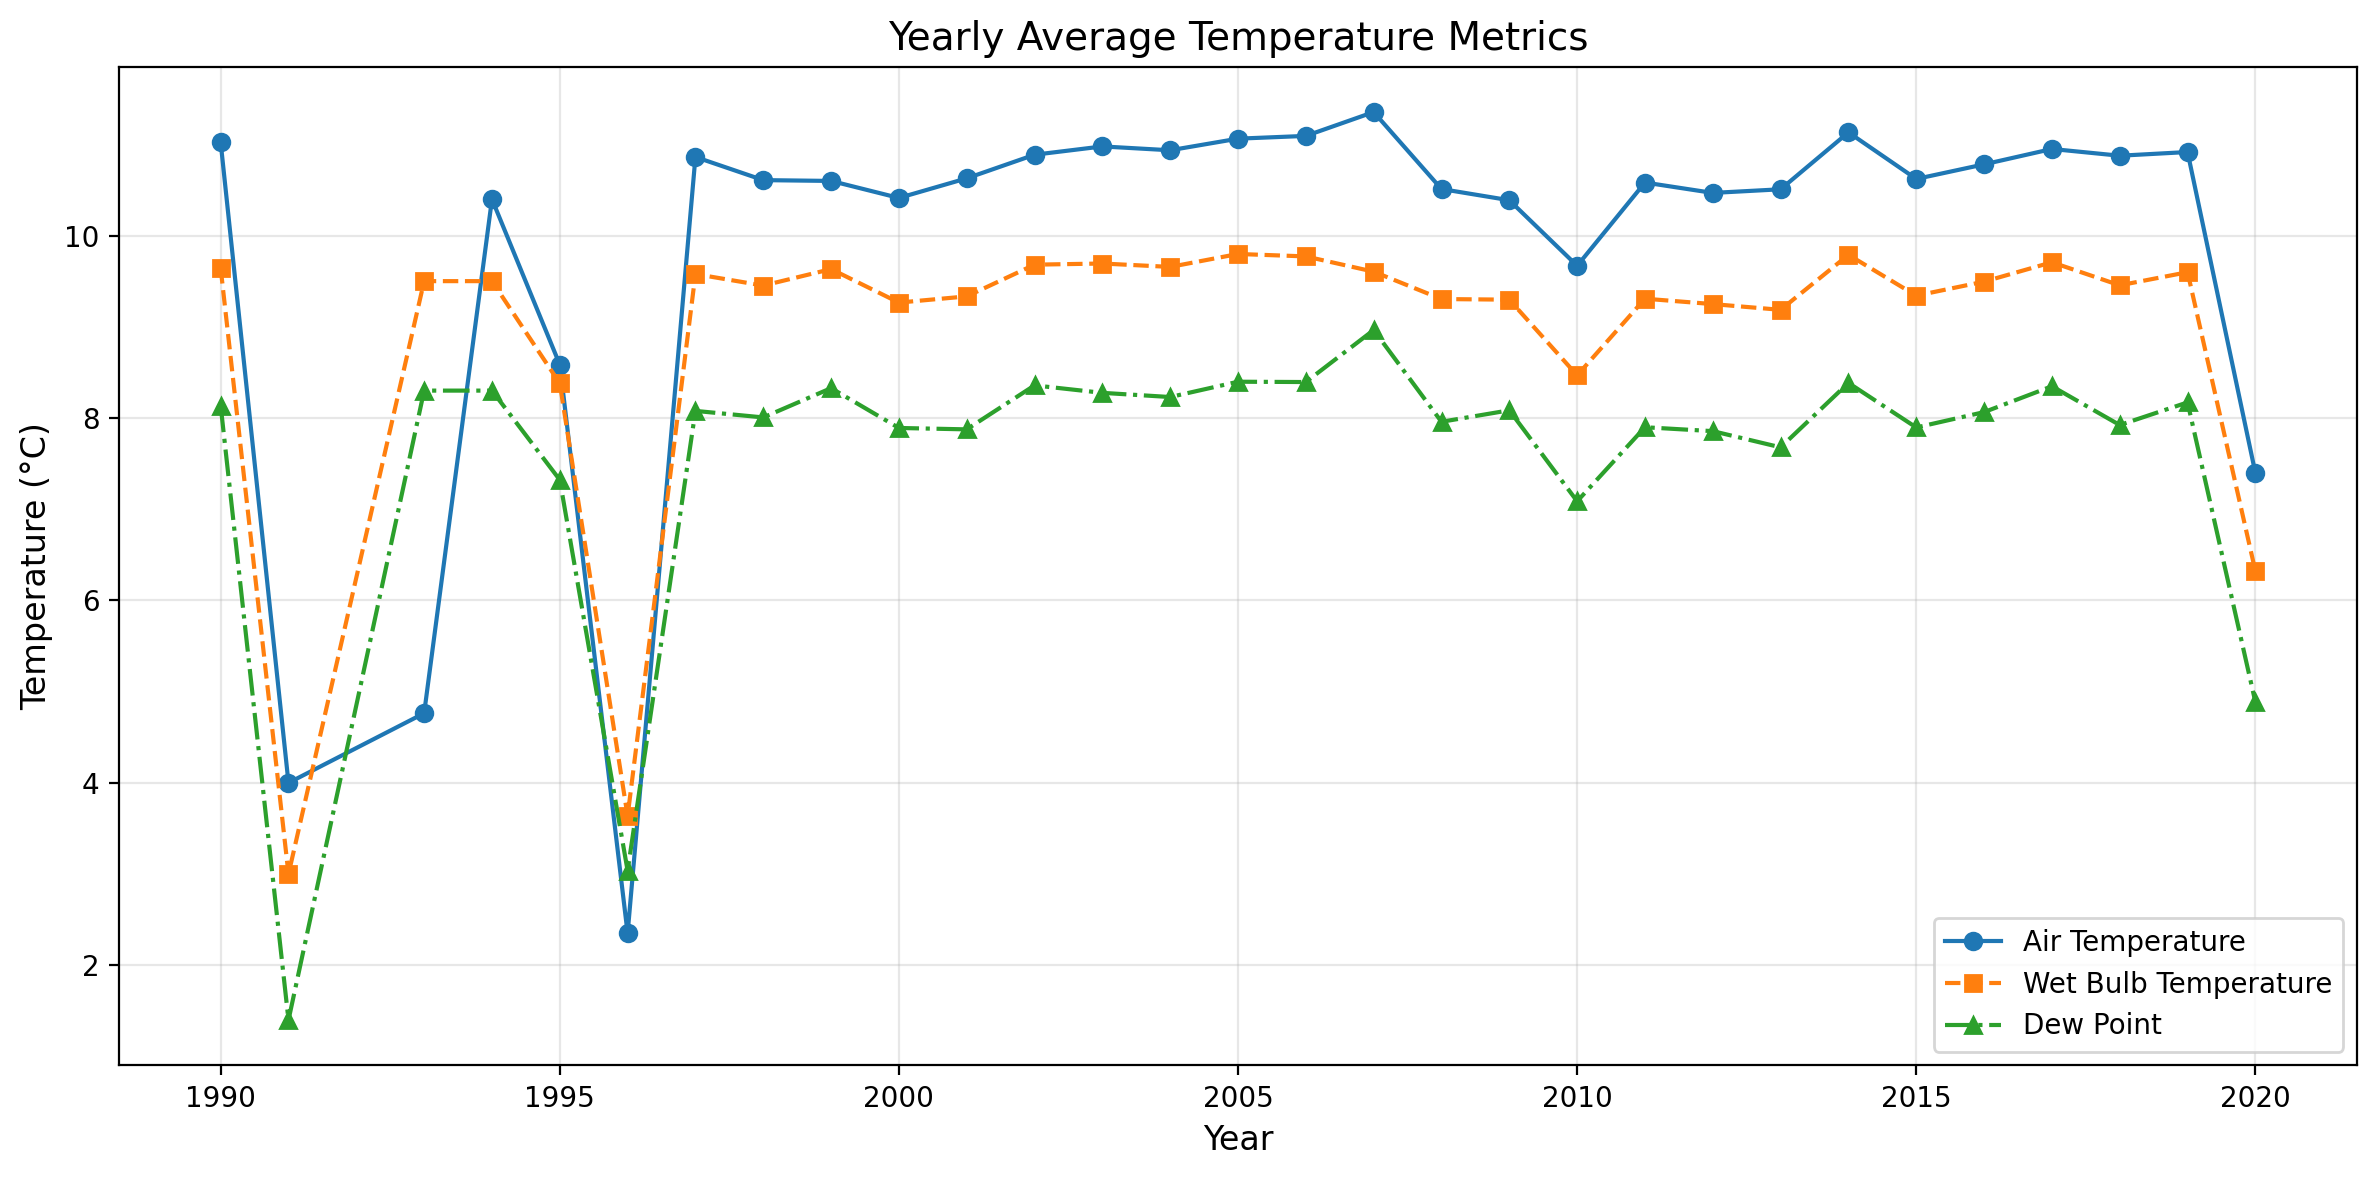

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import year, avg

# 1. Aggregate data by year
yearly_avg = df_filled.groupBy("year").agg(
    avg("air_temperature_imputed").alias("avg_air_temp"),
    avg("wetb_imputed").alias("avg_wetb"),
    avg("dewpt_imputed").alias("avg_dewpt")
).orderBy("year")

# Convert to Pandas DataFrame for plotting
pandas_df = yearly_avg.toPandas()

# 2. Create the plot
plt.figure(figsize=(12, 6))

# Plot each variable
plt.plot(pandas_df['year'], pandas_df['avg_air_temp'],
         marker='o', linestyle='-', label='Air Temperature')
plt.plot(pandas_df['year'], pandas_df['avg_wetb'],
         marker='s', linestyle='--', label='Wet Bulb Temperature')
plt.plot(pandas_df['year'], pandas_df['avg_dewpt'],
         marker='^', linestyle='-.', label='Dew Point')

# 3. Customize the plot
plt.title('Yearly Average Temperature Metrics', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 4. Show/save the plot
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Big Data/Exercise1/temperature_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# Optionally save to file

# Data visualization: Temperature fluctuations in winter season over the 30 years of period

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 30 artists>

Text(0.5, 1.0, 'Average Winter Temperatures by Season')

Text(0.5, 0, 'Winter Season')

Text(0, 0.5, 'Temperature (°C)')

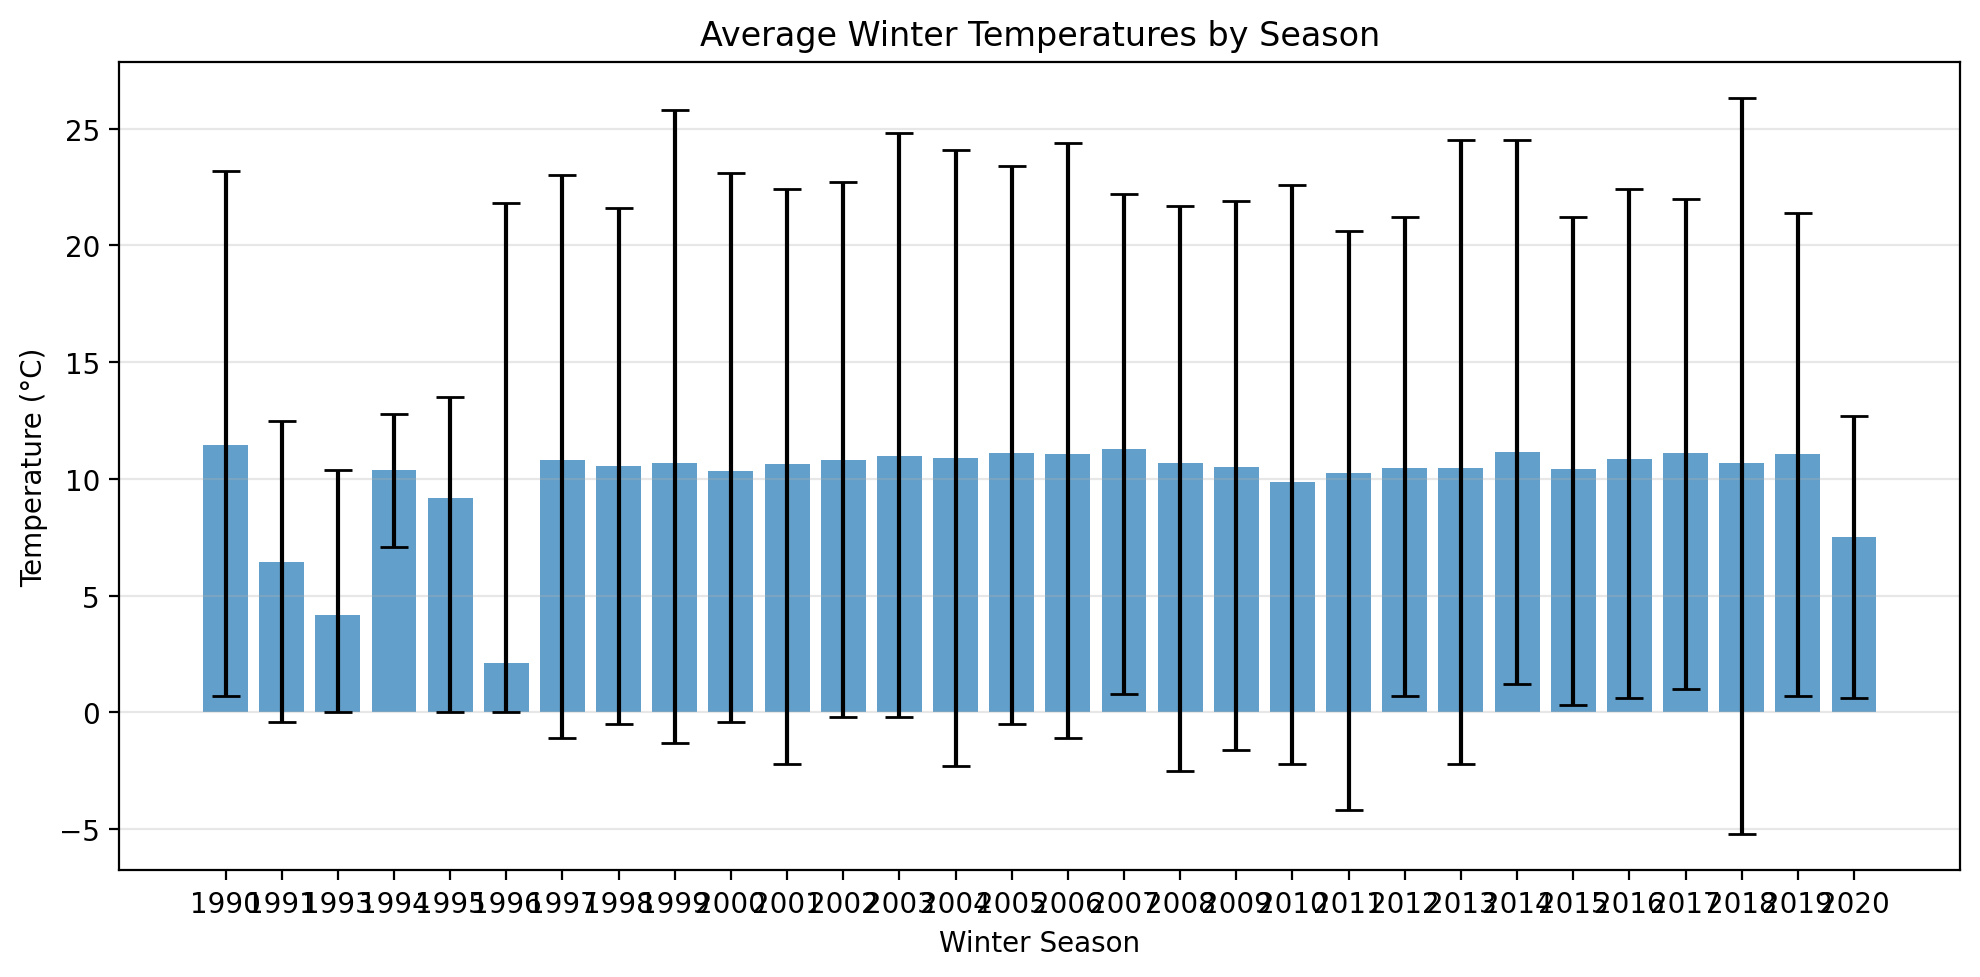

In [ ]:
# Add a "winter season" label (e.g., "2020-2021" for Dec 2020 + Jan/Feb 2021)
from pyspark.sql.functions import when, col, year

df_winter = df_filled.withColumn(
    "winter_season",
    when(col("month") == 12, year("timestamp") + 1)  # Dec 2020 → Winter 2021
    .otherwise(year("timestamp"))                     # Jan/Feb 2021 → Winter 2021
)

# Group by winter season
seasonal_avg = df_winter.groupBy("winter_season").agg(
    avg("air_temperature_imputed").alias("avg_temp"),
    min("air_temperature_imputed").alias("min_temp"),
    max("air_temperature_imputed").alias("max_temp")
).orderBy("winter_season")

# Convert to Pandas and plot as a bar chart
pandas_seasonal = seasonal_avg.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(
    pandas_seasonal["winter_season"].astype(str),
    pandas_seasonal["avg_temp"],
    yerr=[
        pandas_seasonal["avg_temp"] - pandas_seasonal["min_temp"],
        pandas_seasonal["max_temp"] - pandas_seasonal["avg_temp"]
    ],
    capsize=5,
    alpha=0.7
)
plt.title("Average Winter Temperatures by Season")
plt.xlabel("Winter Season")
plt.ylabel("Temperature (°C)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Big Data/Exercise1/temperature_seasonal.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 30 artists>

Text(0.5, 1.0, 'Average Winter Temperatures by Season')

Text(0.5, 0, "Winter Season (''21 = Dec 2020 - Feb 2021)")

Text(0, 0.5, 'Temperature (°C)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '90'),
  Text(1, 0, '91'),
  Text(2, 0, '93'),
  Text(3, 0, '94'),
  Text(4, 0, '95'),
  Text(5, 0, '96'),
  Text(6, 0, '97'),
  Text(7, 0, '98'),
  Text(8, 0, '99'),
  Text(9, 0, '00'),
  Text(10, 0, '01'),
  Text(11, 0, '02'),
  Text(12, 0, '03'),
  Text(13, 0, '04'),
  Text(14, 0, '05'),
  Text(15, 0, '06'),
  Text(16, 0, '07'),
  Text(17, 0, '08'),
  Text(18, 0, '09'),
  Text(19, 0, '10'),
  Text(20, 0, '11'),
  Text(21, 0, '12'),
  Text(22, 0, '13'),
  Text(23, 0, '14'),
  Text(24, 0, '15'),
  Text(25, 0, '16'),
  Text(26, 0, '17'),
  Text(27, 0, '18'),
  Text(28, 0, '19'),
  Text(29, 0, '20')])

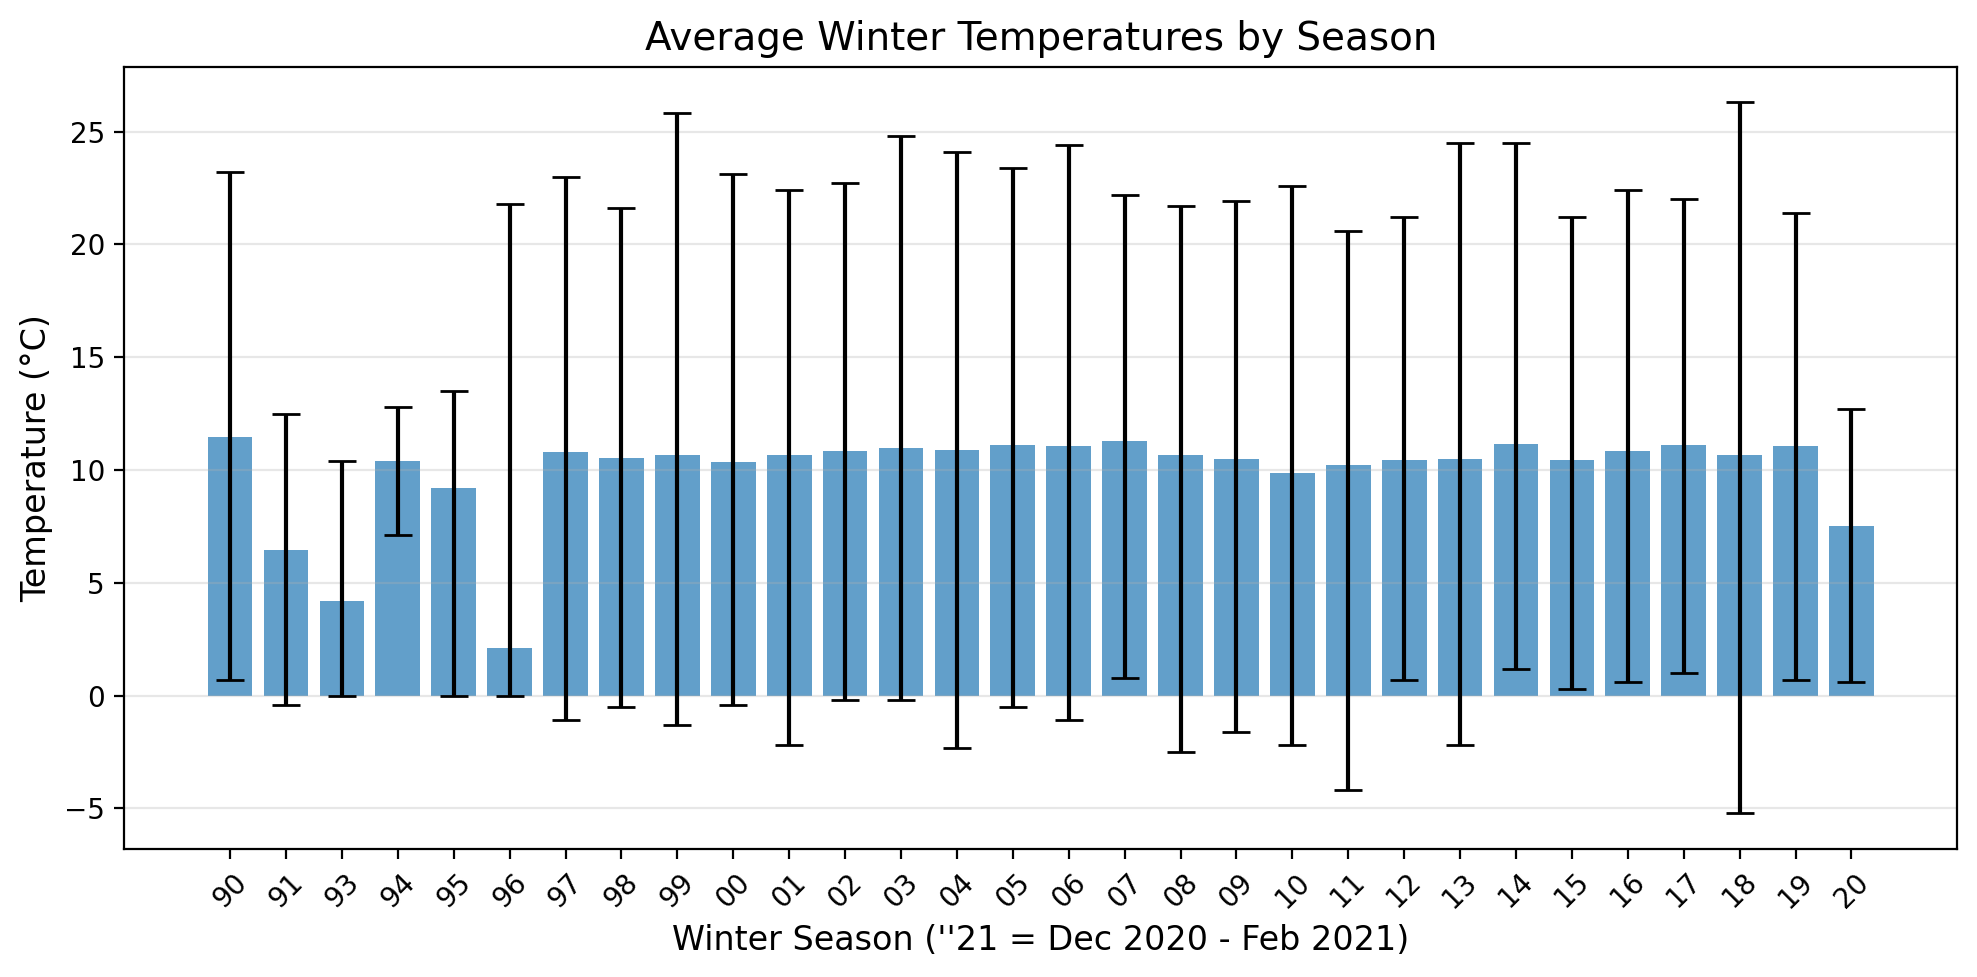

In [ ]:
# ... (previous code to create df_winter and seasonal_avg)

# Convert to Pandas
pandas_seasonal = seasonal_avg.toPandas()

# Shorten "winter_season" labels to last two digits (e.g., 2021 → '21)
pandas_seasonal["winter_label"] = pandas_seasonal["winter_season"].astype(str).str[-2:]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(
    pandas_seasonal["winter_label"],  # Use shortened labels for x-axis
    pandas_seasonal["avg_temp"],
    yerr=[
        pandas_seasonal["avg_temp"] - pandas_seasonal["min_temp"],
        pandas_seasonal["max_temp"] - pandas_seasonal["avg_temp"]
    ],
    capsize=5,
    alpha=0.7,
    color="#1f77b4"
)

# Customize
plt.title("Average Winter Temperatures by Season", fontsize=14)
plt.xlabel("Winter Season (''21 = Dec 2020 - Feb 2021)", fontsize=12)  # Clarify notation
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=45)  # Rotate for readability

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Big Data/Exercise1/temperature_seasonal.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from pyspark.sql.functions import month, collect_list
import matplotlib.pyplot as plt
import numpy as np

# Aggregate data by month and collect values into lists
df_monthly = df_filled.groupBy("month").agg(
    collect_list("air_temperature_imputed").alias("air_temp"),
    collect_list("precipitation_imputed").alias("precip"),
    collect_list("wind_speed_imputed").alias("wind_speed"),
    collect_list("wetb_imputed").alias("wetb"),
    collect_list("dewpt_imputed").alias("dewpt"),
    collect_list("vappr_imputed").alias("vappr")
).orderBy("month")

# Convert to Pandas DataFrame
pandas_monthly = df_monthly.toPandas()

# Extract month numbers and variable data
months = pandas_monthly["month"].tolist()
data = {
    "Air Temperature": [np.array(x) for x in pandas_monthly["air_temp"]],
    "Precipitation": [np.array(x) for x in pandas_monthly["precip"]],
    "Wind Speed": [np.array(x) for x in pandas_monthly["wind_speed"]],
    "Wet Bulb Temp": [np.array(x) for x in pandas_monthly["wetb"]],
    "Dew Point": [np.array(x) for x in pandas_monthly["dewpt"]],
    "Vapor Pressure": [np.array(x) for x in pandas_monthly["vappr"]]
}

# Data visualization: Box plots of various weather variable, group by months.

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf16928da90>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf16928edd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf16928d390>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf1692a4150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf1692a4a50>,
 'means': []}

Text(0.5, 1.0, 'Air Temperature')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Temperature Units')

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf1692b6810>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf16913a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf16928d010>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf16914c4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf16914cdd0>,
 'means': []}

Text(0.5, 1.0, 'Precipitation')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Precipitation Units')

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf169297f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf1691fb790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf169295ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf169200b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf169201410>,
 'means': []}

Text(0.5, 1.0, 'Wind Speed')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Speed Units')

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf1690a0d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf1690ac090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf1690a1ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf1690ad310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf1690adb10>,
 'means': []}

Text(0.5, 1.0, 'Wet Bulb Temp')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Temp Units')

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf168f57710>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf168f5b350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf168f56290>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf168f64590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf168f64e50>,
 'means': []}

Text(0.5, 1.0, 'Dew Point')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Point Units')

<ipython-input-79-660d4c36f9fc>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=month_labels)


{'whiskers': [<matplotlib.lines.Line2D at 0x7bf168fa02d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf168e12010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf168f5df90>,
 'medians': [<matplotlib.lines.Line2D at 0x7bf168e132d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bf168e13c50>,
 'means': []}

Text(0.5, 1.0, 'Vapor Pressure')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Pressure Units')

Text(0.5, 1.02, 'Monthly Distribution of Weather Variables')

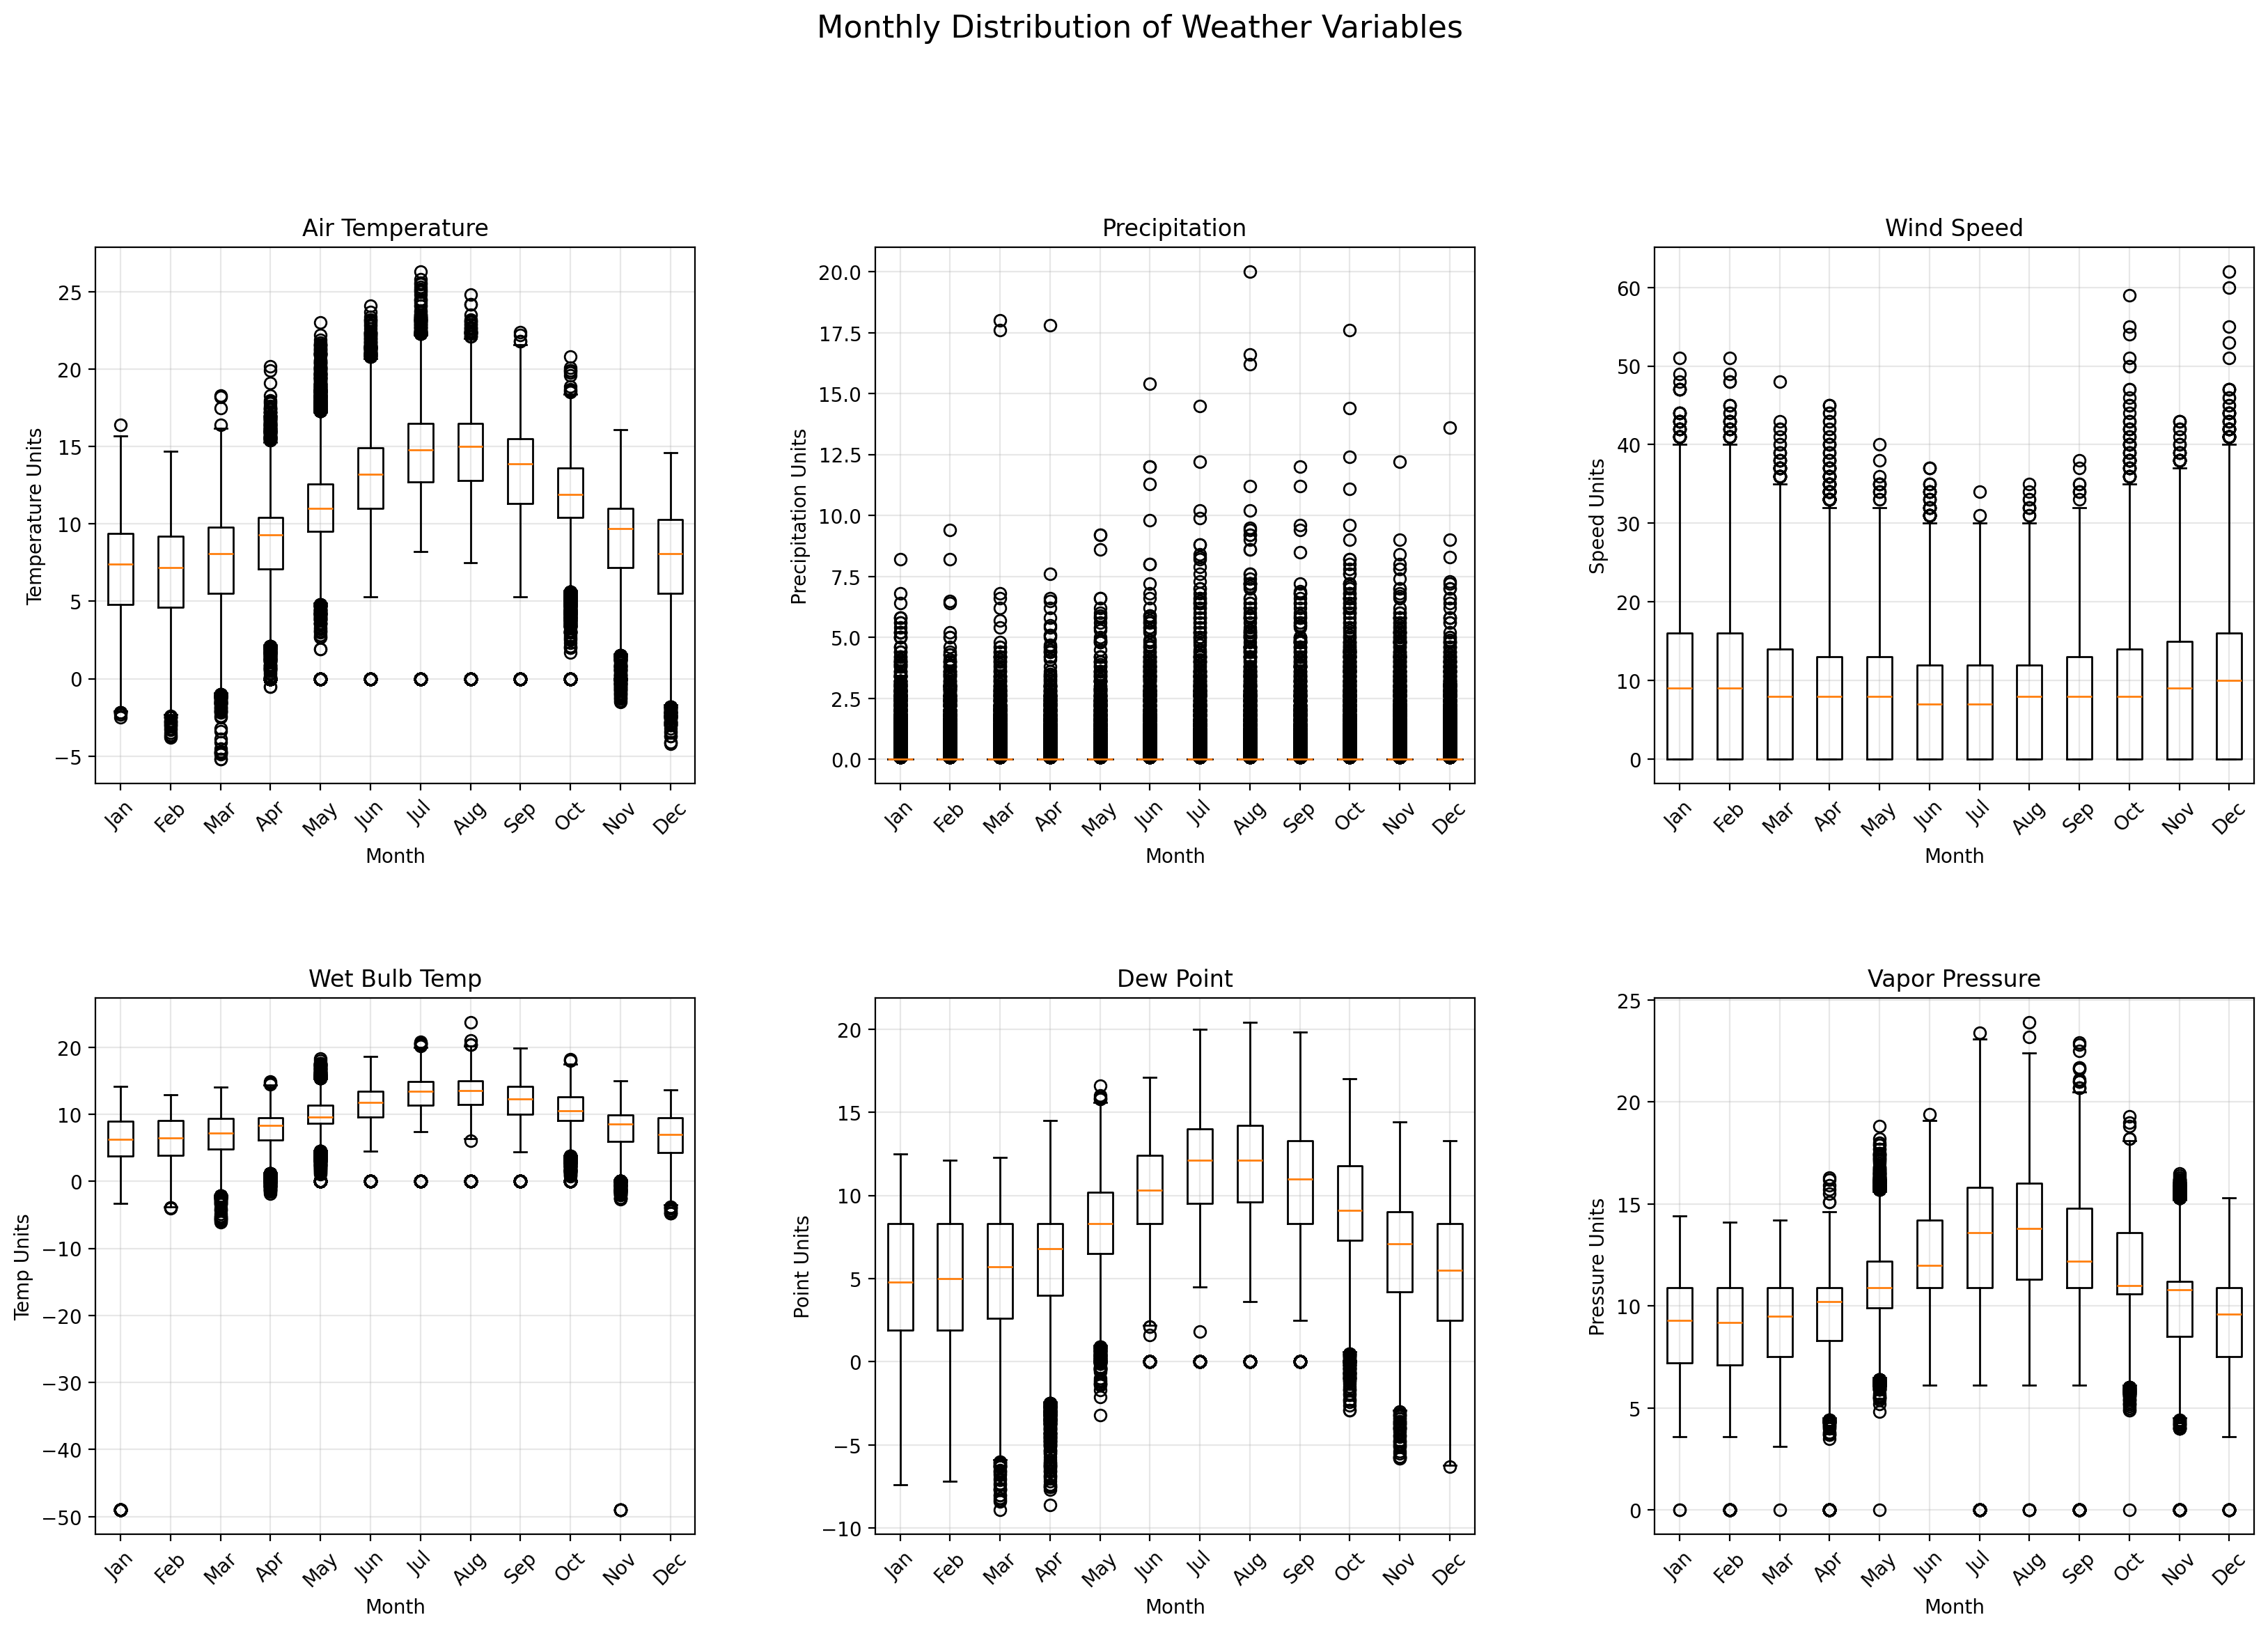

In [ ]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Define month labels (Jan-Dec)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot each variable
for ax, (title, values) in zip(axes.flatten(), data.items()):
    # Create box plots
    ax.boxplot(values, labels=month_labels)

    # Customize
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Month", fontsize=10)
    ax.set_ylabel(title.split(' ')[-1] + " Units", fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Monthly Distribution of Weather Variables", fontsize=16, y=1.02)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Big Data/Exercise1/monthly_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()